# Breast Cancer Classification

## 1. Problem Definition

> Given features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Detect if patient has breast cancer malignant or benign.

## 2. Data

Dataset comes from : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data 

## 3. Evaluation

> Because domain requires more accuracy so that it can become more reliable. At least 90 - 95% accuracy

## 4. Features

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. (32 features) Ten real-valued features are computed for each cell nucleus:
    * a) radius (mean of distances from center to points on the perimeter)
    * b) texture (standard deviation of gray-scale values)
    * c) perimeter
    * d) area
    * e) smoothness (local variation in radius lengths)
    * f) compactness (perimeter^2 / area - 1.0)
    * g) concavity (severity of concave portions of the contour)
    * h) concave points (number of concave portions of the contour)
    * i) symmetry
    * j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Exploration and Modeling


### Import tools

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(columns=["id","Unnamed: 32"])

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Summary dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Convert diagnosis column to numeric

In [8]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B" : 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Check missing values

In [9]:
any(df.isna().sum()) # no missing values

False

### Correlation matrix

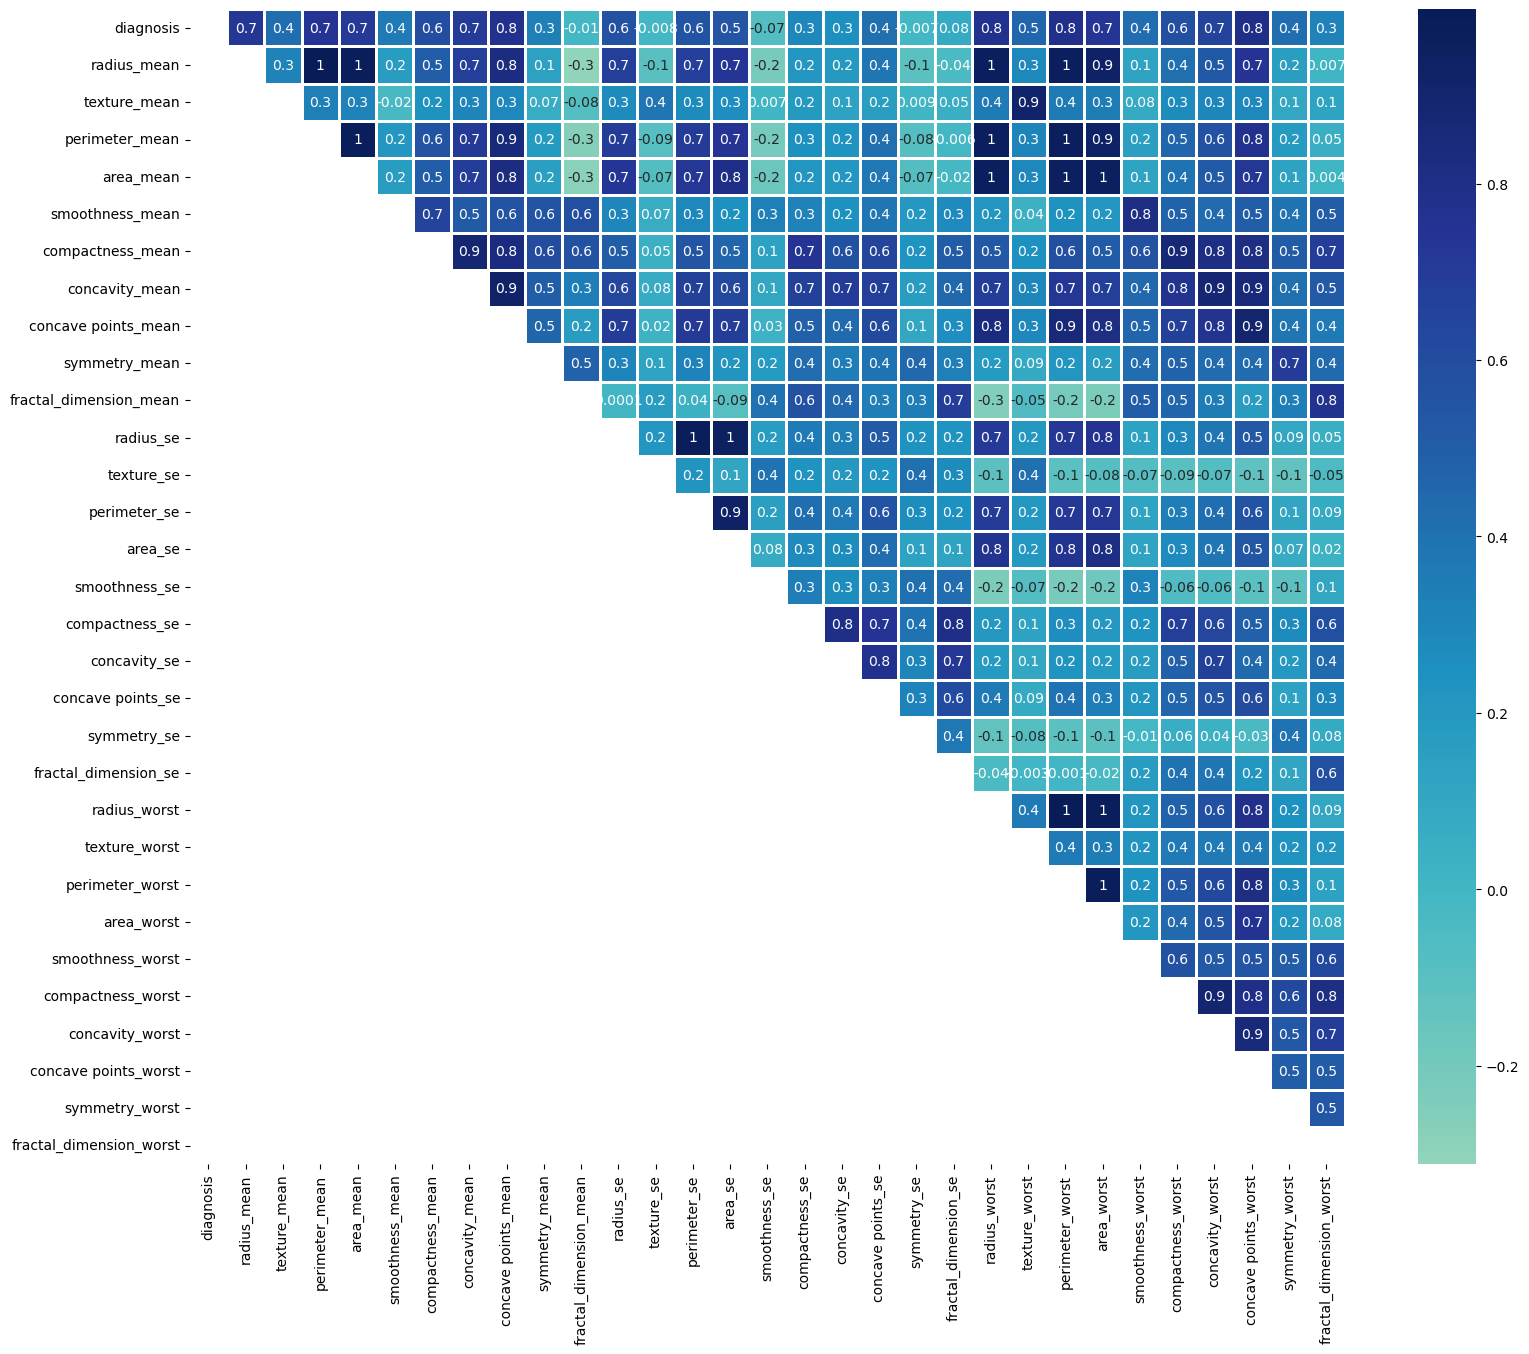

In [10]:
plt.figure(figsize=(19, 15))

corr = df.corr()

mask = np.tril(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(
    df.corr(),
    mask=mask,
    center=0,
    annot=True,
    square=True,
    linewidths=1,
    fmt=".1g",
    cmap="YlGnBu",
)


### Data Exploration

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


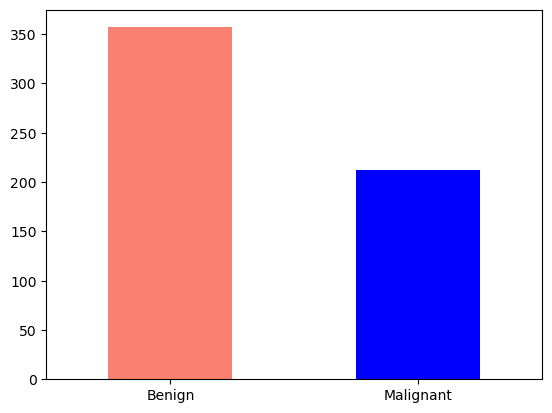

In [12]:
df["diagnosis"].map({1: "Malignant", 0: "Benign"}).value_counts().plot(
    kind="bar", color=["salmon", "blue"], rot=0
);


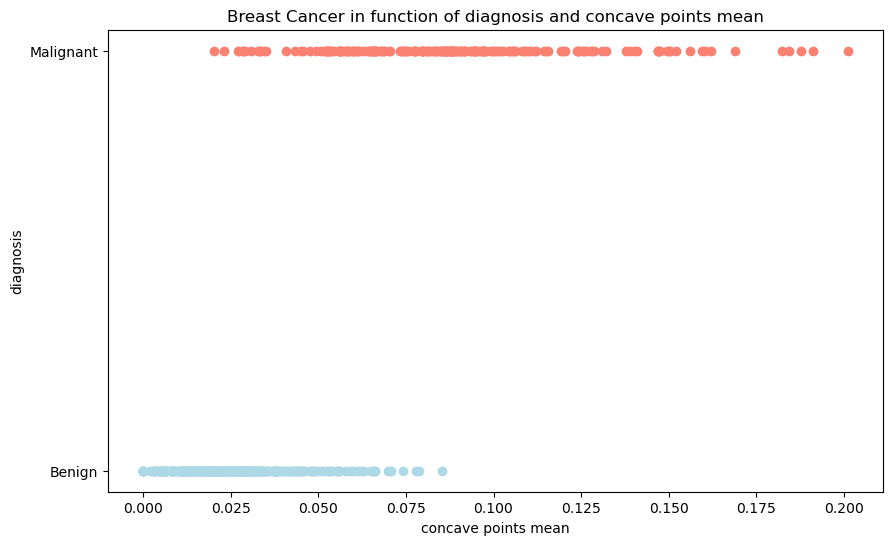

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(df["concave points_mean"][df["diagnosis"] == 1], df["diagnosis"][df["diagnosis"] == 1], c="salmon")
plt.scatter(df["concave points_mean"][df["diagnosis"] == 0], df["diagnosis"][df["diagnosis"] == 0], c="lightblue")
plt.title("Breast Cancer in function of diagnosis and concave points mean")
plt.xlabel("concave points mean")
plt.ylabel("diagnosis")
plt.yticks([0, 1], labels=["Benign", "Malignant"]);

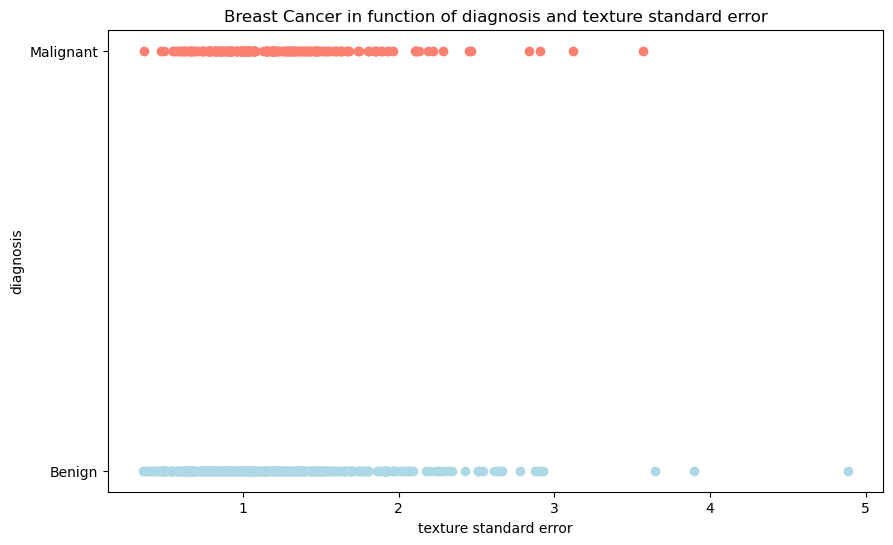

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(df["texture_se"][df["diagnosis"] == 1], df["diagnosis"][df["diagnosis"] == 1], c="salmon")
plt.scatter(df["texture_se"][df["diagnosis"] == 0], df["diagnosis"][df["diagnosis"] == 0], c="lightblue")
plt.title("Breast Cancer in function of diagnosis and texture standard error")
plt.xlabel("texture standard error")
plt.ylabel("diagnosis")
plt.yticks([0, 1], labels=["Benign", "Malignant"]);

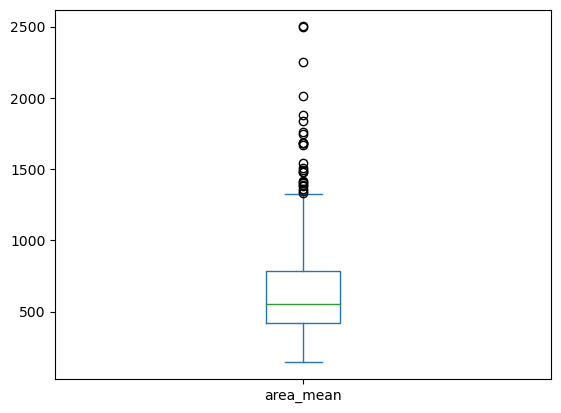

In [15]:
df["area_mean"].plot.box();

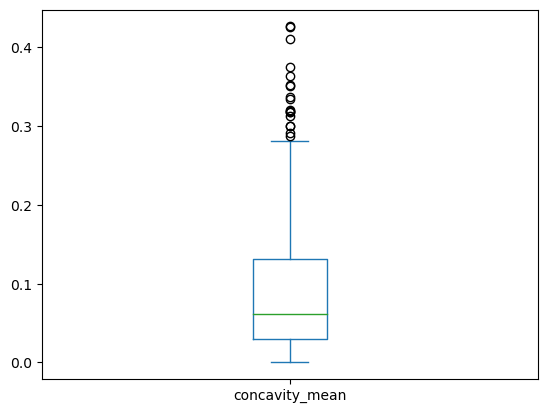

In [16]:
df["concavity_mean"].plot.box();

## 5. Modeling

In [17]:
X, y = df.drop(columns=["diagnosis"]), df["diagnosis"]

In [22]:
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_1.shape, X_test.shape, y_1.shape, y_test.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=7)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(455, 30) (114, 30) (455,) (114,)
(364, 30) (91, 30) (364,) (91,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(7)

    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)
    return model_scores


In [28]:
model_scores = fit_and_score(models, X_train, y_train, X_valid, y_valid)
model_scores

d:\Projects\Detect-Breast-Cancer\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.989010989010989,
 'K Neighbors': 0.989010989010989,
 'Random Forest': 1.0}

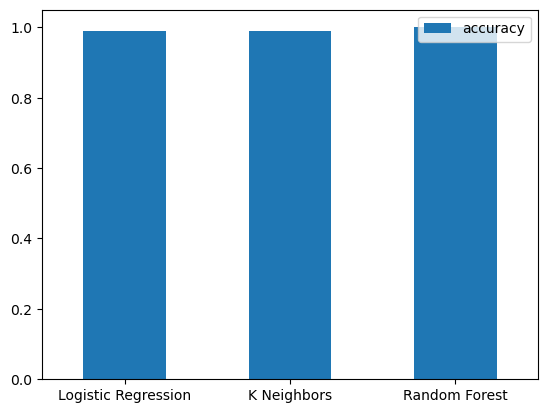

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(rot=0);

## Hyperparameters

### Logistic Regression

In [78]:
train_scores = []
val_scores = []
test_scores = []

# Params for logistic regression
solver = "liblinear"
C = np.logspace(-2, 10, num=5)

lr = LogisticRegression(solver=solver)

for c in C:
    lr.set_params(C=c)

    lr.fit(X_train, y_train)
    
    train_scores.append(lr.score(X_train, y_train))
    
    val_scores.append(lr.score(X_valid, y_valid))
    
    test_scores.append(lr.score(X_test, y_test))


Maximum Logistic Regression score on the test data:  96.49%


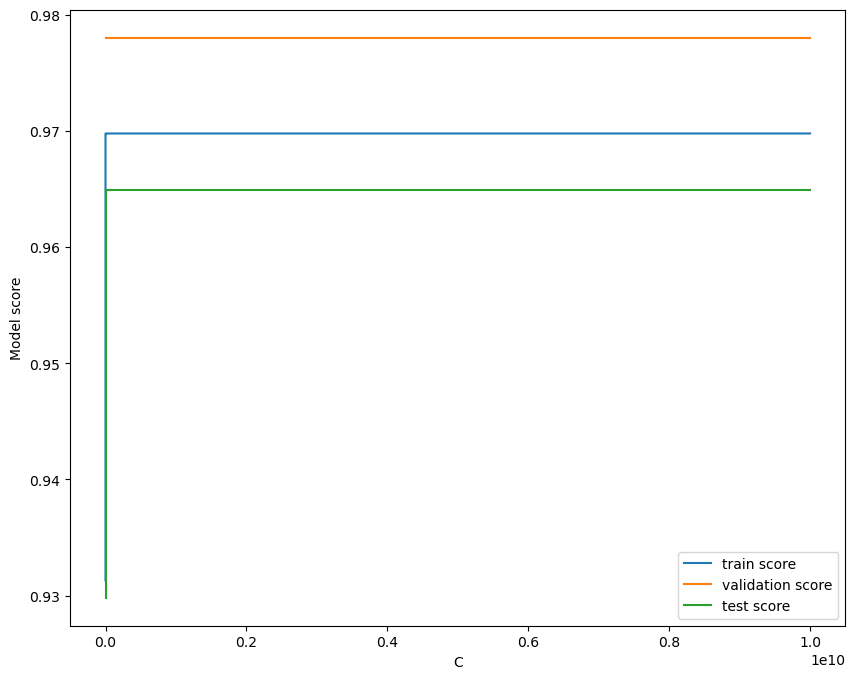

In [79]:
plt.figure(figsize=(10, 8))
plt.plot(C, train_scores, label="train score")
plt.plot(C, val_scores, label="validation score")
plt.plot(C, test_scores, label="test score")
plt.xlabel("C")
plt.ylabel("Model score")
plt.legend()
print(
    f"Maximum Logistic Regression score on the test data: {max(test_scores) * 100: .2f}%"
)


### K nearest neighbors

In [80]:
train_scores = []
val_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))

    val_scores.append(knn.score(X_valid, y_valid))

    test_scores.append(knn.score(X_test, y_test))


Maximum KNN score on the test data:  93.86%


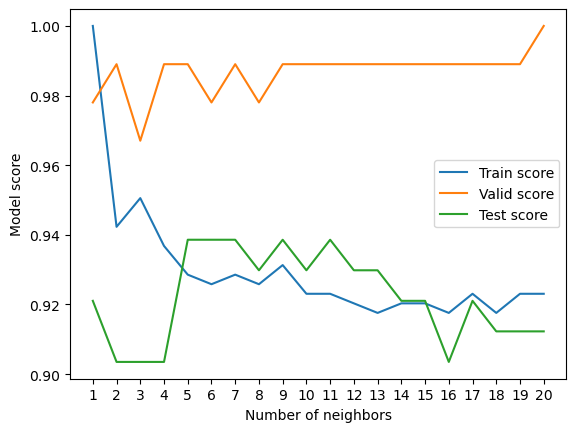

In [81]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, val_scores, label="Valid score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100: .2f}%")

In [82]:
train_scores = []
val_scores = []
test_scores = []

n_estimators = [10, 100, 250, 500, 750, 1000]

rfc = RandomForestClassifier()

for i in n_estimators:
    rfc.set_params(n_estimators=i)

    rfc.fit(X_train, y_train)

    train_scores.append(rfc.score(X_train, y_train))

    val_scores.append(rfc.score(X_valid, y_valid))

    test_scores.append(rfc.score(X_test, y_test))

Maximum RFC score on the test data:  99.12%


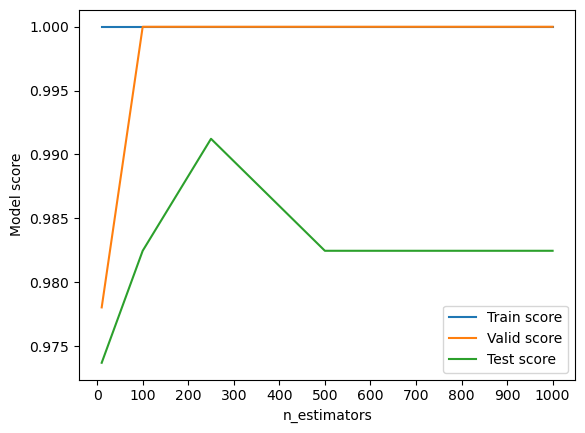

In [84]:
plt.plot(n_estimators, train_scores, label="Train score")
plt.plot(n_estimators, val_scores, label="Valid score")
plt.plot(n_estimators, test_scores, label="Test score")
plt.xticks(np.arange(0, 1001, 100))
plt.xlabel("n_estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum RFC score on the test data: {max(test_scores) * 100: .2f}%")

### Hyperparameter tuning with RandomizedSearchCV

In [97]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 10, 20), "solver": ["liblinear"]}

# Hyperparameter grid for Random Forest Classifier
rf_grid = {
    "n_estimators": np.arange(100, 600, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

#### Logistic Regression

In [89]:
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(random_state=7),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True,
)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 5.45559478e-04, 2.97635144e-03, 1.62377674e-02,
       8.85866790e-02, 4.83293024e-01, 2.63665090e+00, 1.43844989e+01,
       7.84759970e+01, 4.28133240e+02, 2.33572147e+03, 1.27427499e+04,
       6.95192796e+04, 3.79269019e+05, 2.06913808e+06, 1.12883789e+07,
       6.15848211e+07, 3.35981829e+08, 1.83298071e+09, 1.00000000e+10]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [90]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 379269.0190732238}

In [91]:
rs_log_reg.score(X_valid, y_valid)

0.978021978021978

In [92]:
rs_log_reg.score(X_test, y_test)

0.9649122807017544

#### Random Forest

In [93]:
rs_rfc = RandomizedSearchCV(
    RandomForestClassifier(random_state=7),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True,
)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])},
                   verbose=True)

In [96]:
rs_rfc.best_params_

{'n_estimators': 300,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [94]:
rs_rfc.score(X_valid, y_valid)

1.0

In [95]:
rs_rfc.score(X_test, y_test)

0.9649122807017544

### Hyperparameter tuning with GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV

rfc_grid = {
    "n_estimators": np.arange(200, 301, 50),
    "max_depth": [None, 10],
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 6, 1),
}

In [110]:
gs_rfc = GridSearchCV(RandomForestClassifier(random_state=7), param_grid=rfc_grid, cv=5, verbose=True)

gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
             param_grid={'max_depth': [None, 10],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'n_estimators': array([200, 250, 300])},
             verbose=True)

In [111]:
gs_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [112]:
gs_rfc.score(X_valid, y_valid)

1.0

In [123]:
score = gs_rfc.score(X_test, y_test)
score

0.9912280701754386

## Evaluate machine learning classifier beyond accurracy

### ROC curve and AUC curve

In [127]:
from sklearn.metrics import RocCurveDisplay

In [114]:
y_pred = gs_rfc.predict(X_test)

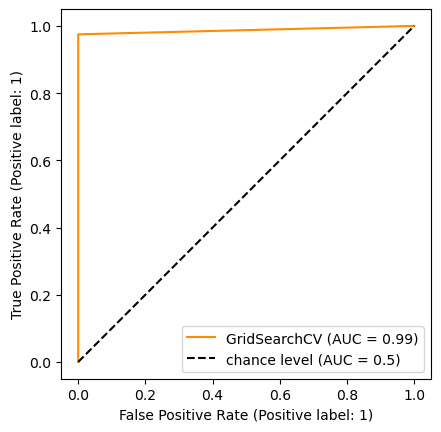

In [133]:
RocCurveDisplay.from_predictions(
    y_test, y_pred, name=f"GridSearchCV", color="darkorange"
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.legend()
plt.show()


### Confusion matrix

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
print(confusion_matrix(y_test, y_pred))

[[74  0]
 [ 1 39]]


In [136]:
sns.set(font_scale=1.5)


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(
        confusion_matrix(y_test, y_preds), annot=True, cbar=False  # Annotate the boxes
    )
    plt.xlabel("Predicted label")  # predictions go on the x-axis
    plt.ylabel("True label")  # true labels go on the y-axis

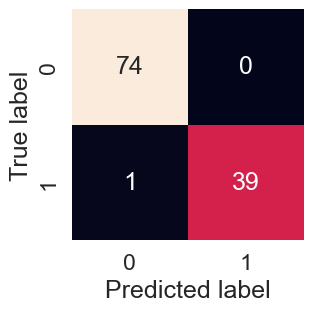

In [137]:
plot_conf_mat(y_test, y_pred)

### Classification Report

In [138]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Calculate evaluation metrics using cross-validation

In [141]:
gs_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [149]:
rfc = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=7
)


In [150]:
from sklearn.model_selection import cross_val_score

In [155]:
# Cross-validation accuracy
cross_acc = cross_val_score(rfc, X, y, cv=5, scoring="accuracy")
cross_acc = np.mean(cross_acc)
cross_acc

0.9648657040832168

In [156]:
# Cross-validation precision
cross_pre = cross_val_score(rfc, X, y, cv=5, scoring="precision")
cross_pre = np.mean(cross_pre)
cross_pre

0.9665218502427806

In [157]:
# Cross-validation recall
cross_recall = cross_val_score(rfc, X, y, cv=5, scoring="recall")
cross_recall = np.mean(cross_recall)
cross_recall

0.9390919158361019

In [158]:
# Cross-validation f1
cross_f1 = cross_val_score(rfc, X, y, cv=5, scoring="f1")
cross_f1 = np.mean(cross_f1)
cross_f1

0.9521964883514382

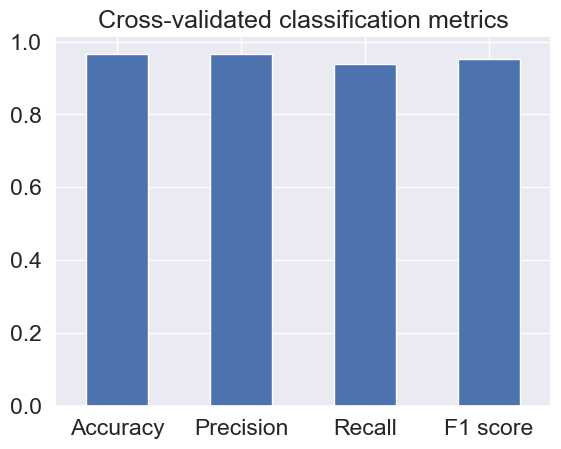

In [160]:
cv_metrics = pd.DataFrame(
    {
        "Accuracy": cross_acc,
        "Precision": cross_pre,
        "Recall": cross_recall,
        "F1 score": cross_f1,
    },
    index=[0],
)

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False, rot=0);

### Feature Importance

In [163]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=7)

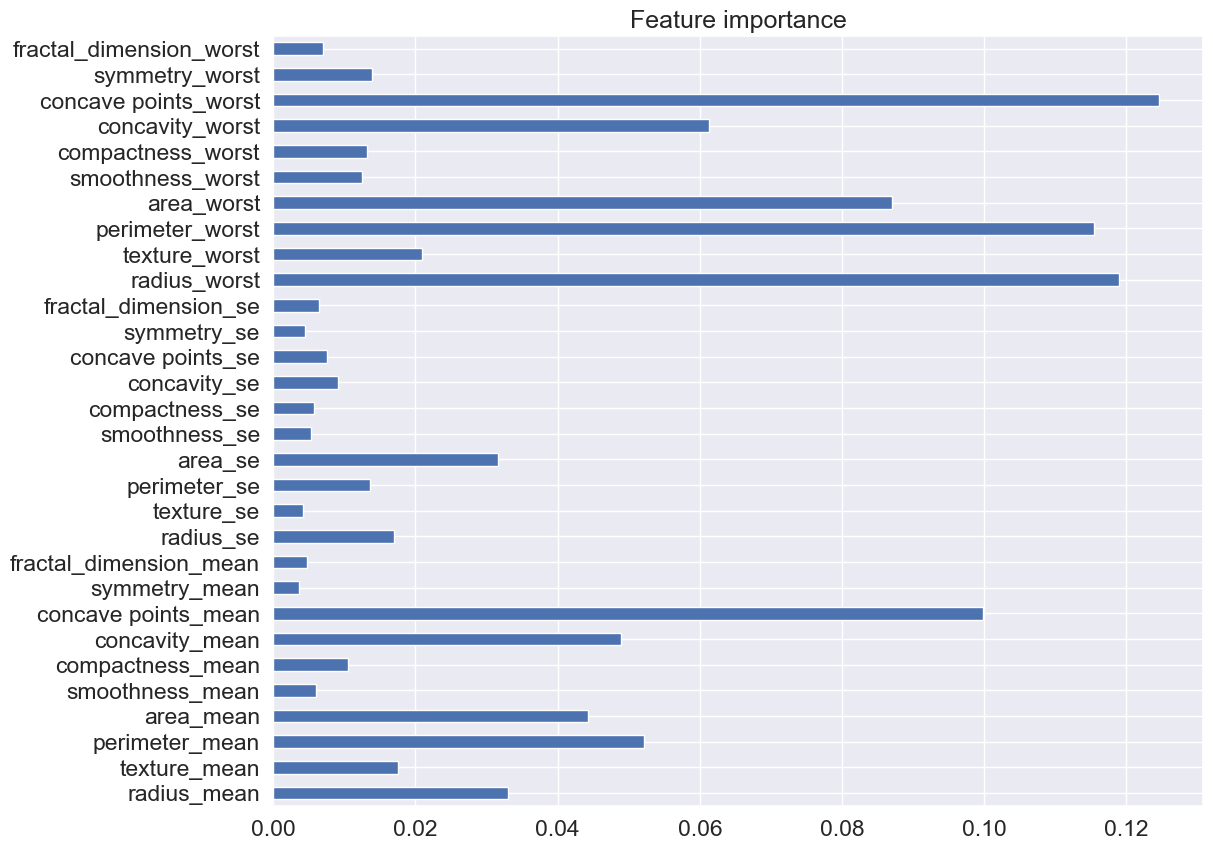

In [179]:
feature_dict = dict(zip(X.columns, rfc.feature_importances_))

# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(title="Feature importance", legend=False, figsize=(12, 10));


## Summary

* Random Forest take a while to train with high precision (Logistic Regression gives the sweet spot)
* Suggestion: Collect more data, Improve current model, find which features keep and not, Try a better model: CatBoost or XGBoost

**Note**: the cross validation score base on entire dataset while the actual training model base on train-val-test dataset

## Exports model

In [180]:
from joblib import dump

dump(rfc, "rfc_trained.joblib")

['rfc_trained.joblib']